nfft = 10050


0

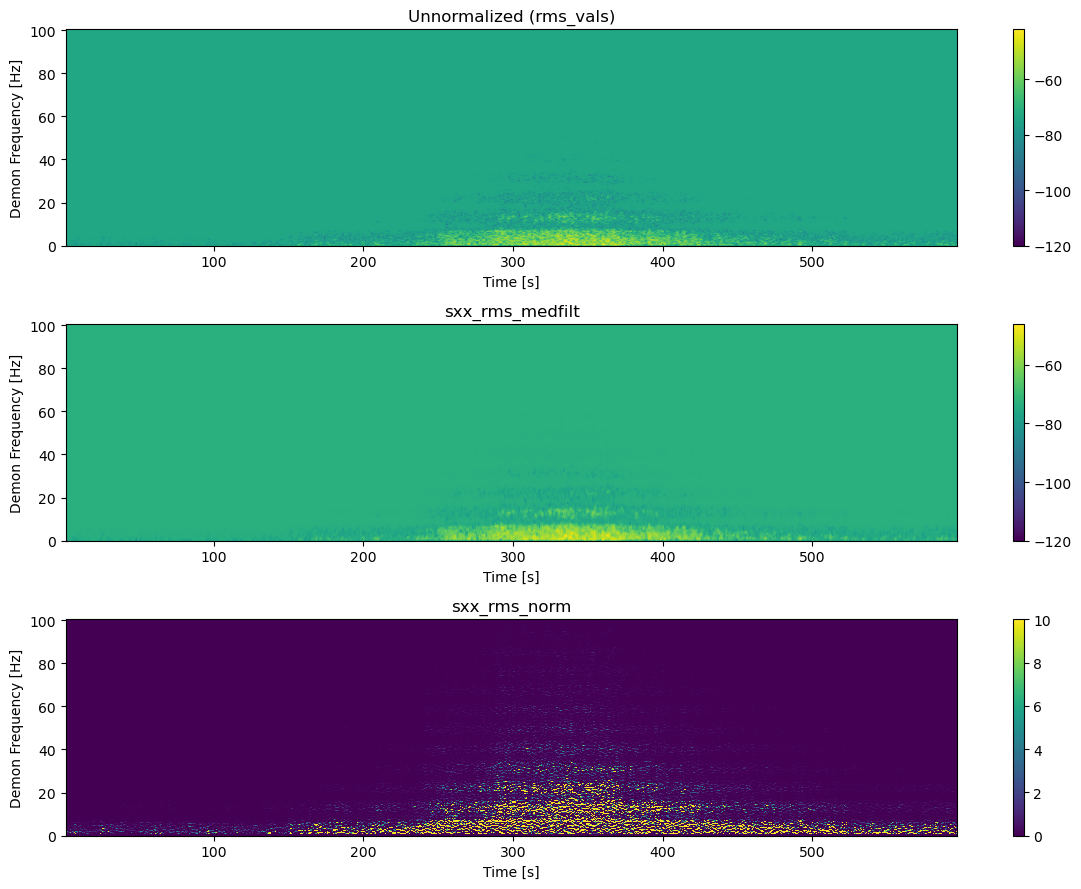

In [43]:
#DEMON 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample_poly, butter, hilbert
import librosa
import scipy.signal as signal

def Demon2(audio_file, Fs, Fd_filt, nperseg, Freq_filt):
    ###input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"

    #Sampling org data
    data_org, sr = librosa.load(audio_file)

    #Downsample to Fs
    ###Fs = 2000
    DS_org = resample_poly(data_org,1,int(sr/Fs))

    #removing dc_offcet
    data = DS_org - np.mean(DS_org)

    #RMS data of hilbert
    medfilt_window = Fd_filt #Number of samples in time axis of original audio to smooth
    kernal_size = medfilt_window + (medfilt_window%2 == 0)
    analytic_signal = np.abs(hilbert(data))**2
    h_filt = signal.medfilt(analytic_signal,kernal_size)
    #Downsampled so that each new sample is a mean of h_filt samples
    rms_values  = np.sqrt(resample_poly(h_filt,1,int(Fs/kernal_size)))

    #hente freq
    nperseg= nperseg #Number of samples in time axis to use for each vertical spectrogram coloumn
    print(f"nfft = {int(200*nperseg*kernal_size / Fs)}")
    fd_rms, td_rms, sxx_rms = signal.spectrogram(rms_values,kernal_size,
                                                nperseg=nperseg,
                                                noverlap=5*nperseg//6,
                                                nfft=int(250*nperseg / kernal_size),
                                                )
    #sxx_rms = np.abs(sxx_rms)
    sxx_rms = np.abs(sxx_rms- np.mean(sxx_rms))
    

    #med filt over hver kolonne
    vertical_medfilt_size  = Freq_filt

    sxx_rms_med = np.zeros_like(sxx_rms)
    for i in range(sxx_rms.shape[1]):
        sxx_rms_med[:,i] = signal.medfilt(sxx_rms[:,i],kernel_size=vertical_medfilt_size)

    #Normaliserer sxx
    sxx_rms_norm = sxx_rms/sxx_rms_med
    sxx_rms_norm[:2, :] = 1e-10
    sxx_rms_norm[-2:, :] = 1e-10


    #plotting
    plt.figure(figsize=(12,9))

    #rms test plot
    
    plt.subplot(3, 1, 1)
    plt.imshow(10 * np.log10(sxx_rms), aspect="auto", origin="lower", extent=[td_rms.min(), td_rms.max(), fd_rms.min(), fd_rms.max()],vmin=-120,vmax=None)
    plt.colorbar()
    plt.xlabel("Time [s]")
    plt.ylabel("Demon Frequency [Hz]")
    plt.title("Unnormalized (rms_vals)")

    plt.subplot(3, 1, 2)
    plt.imshow(10 * np.log10(sxx_rms_med), aspect="auto", origin="lower", extent=[td_rms.min(), td_rms.max(), fd_rms.min(), fd_rms.max()],vmin=-120,vmax=None)
    plt.colorbar()
    plt.xlabel("Time [s]")
    plt.ylabel("Demon Frequency [Hz]")
    plt.title("sxx_rms_medfilt")

    plt.subplot(3, 1, 3)
    plt.imshow(100 * np.log10(sxx_rms_norm), aspect="auto", origin="lower", extent=[td_rms.min(), td_rms.max(), fd_rms.min(), fd_rms.max()],vmin=0,vmax=10)
    plt.colorbar()
    plt.xlabel("Time [s]")
    plt.ylabel("Demon Frequency [Hz]")
    plt.title("sxx_rms_norm")

    plt.tight_layout()
    return 0


input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
#for i in range(7,14):
 #   Demon2(input_file,Fs = 2000, Fd_filt=i*100, nperseg=100, Freq_filt=3)


Demon2( input_file, Fs = 2000, Fd_filt=200, nperseg = 500, Freq_filt=5)

